# Binary Classification (Breast Cancer Dataset)
## Data Cleanup

In [55]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
#from tensorflow.keras.models import Sequential
##from tensorflow.keras.layers import Dense
#from keras.wrappers.scikit_learn import KerasClassifier


from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report, confusion_matrix
df1 = pd.read_csv('data-hopi.csv')
print('Dataframe shape: ', df1.shape)
df1.head()

Dataframe shape:  (375, 204)


,Numéro,Age,Ménopausée,Groupe_dâge,Tranche dâge,Origine,Ménarche,Première_grossesse,Parité,Parité Répartition,...,Taille_tumorale_intervalle,Délai de confirmation,Traitement_radical,Délai chimiothérapie-chirurgie,Délai radiothérapie-chirurgie,Délai hormonothérapie-chirurgie,Délai de récidive locorégionale,Délai de rechute métastatique,Délai de bilatéralisation,Délai_chir_rt_grp
0,342,50,1,50-59ans,36-69 ans,citadine,11.0,24.0,2,Multipare,...,0,37.0,oui,NaN,97.0,1960.0,NaN,NaN,NaN,91-180 jours
1,340,72,1,>70ans,>70,citadine,NaN,0.0,0,Nullipare,...,0,107.0,oui,NaN,NaN,1826.0,NaN,NaN,NaN,NaN
2,363,75,1,>70ans,>70,rurale,15.0,22.0,10,Multipare,...,< 10 mm,45.0,non,NaN,265.0,1827.0,NaN,NaN,NaN,>180 jours
3,156,63,1,60-69ans,36-69 ans,rurale,NaN,NaN,7,Multipare,...,< 10 mm,32.0,oui,66.0,NaN,NaN,1492.0,1492.0,NaN,NaN
4,212,53,1,50-59ans,36-69 ans,rurale,12.0,18.0,2,Multipare,...,< 10 mm,37.0,oui,NaN,NaN,1836.0,NaN,NaN,NaN,NaN


In [56]:
print(df1.columns)

Index(['Numéro', 'Age', 'Ménopausée', 'Groupe_dâge', 'Tranche dâge', 'Origine',
       'Ménarche', 'Première_grossesse', 'Parité', 'Parité Répartition',
       ...
       'Taille_tumorale_intervalle', 'Délai de confirmation',
       'Traitement_radical', 'Délai chimiothérapie-chirurgie',
       'Délai radiothérapie-chirurgie', 'Délai hormonothérapie-chirurgie',
       'Délai de récidive locorégionale', 'Délai de rechute métastatique',
       'Délai de bilatéralisation', 'Délai_chir_rt_grp'],
      dtype='object', length=204)


In [57]:
df1['Tolérance_à_la_chimiothérapie'].fillna('Aucune', inplace=True)
#df1['Fin Radiothérapie'].fillna('Aucune', inplace=True)
#df1['Début Chimiothérapie'].fillna('Aucune', inplace=True)
#df1['Fin Chimiothérapie'].fillna('Aucune', inplace=True)
df1['Champs_dirradiation'].fillna('no irradiation', inplace=True)
df1['Tolérance_Radiothérapie'].fillna('Aucune', inplace=True)
df1['Type_Chimiothérapie'].fillna('Aucune', inplace=True)
df1['Type_Hormonothérapie'].fillna('Aucune', inplace=True)
df1['Nombre_de_cures_de_chimiothérapie'].fillna(0,inplace=True)
df1['Nombre_de_cures_Herceptine'].fillna(0,inplace=True)
df1['Tolérance_Herceptine'].fillna('NON',inplace=True)
df1['%RO'].fillna(0,inplace=True)
df1['%RP'].fillna(0,inplace=True)
df1['Ménarche'].fillna(df1['Ménarche'].mean(),inplace=True)
df1['Première_grossesse'].fillna(df1['Première_grossesse'].mean(),inplace=True)
#df1['Type_histologique_de_la_bilatéralisation'].fillna('Aucune',inplace=True)
#df1['Traitement_Bilatéralisation'].fillna('Aucune',inplace=True)
#df1['Date_Métastases'].fillna('Aucune',inplace=True)
#df1['Siège_Métastases'].fillna('Aucune',inplace=True)
#df1['Siège Métastases'].fillna('Aucune',inplace=True)
df1['Ht_cons'].fillna('Non',inplace=True)
df1['Dose_dirradiation'].fillna(0,inplace=True)
df1['Méthode_du_ganglion_sentinelle'].fillna('Aucune',inplace=True)
df1['Nombre_des_ganglions_sentinelles'].fillna(0,inplace=True)
df1['Aspect_du_ganglion_sentinelle'].fillna('Aucun',inplace=True)
df1['Nombre_des_ganglions_du_curage_axillaire'].fillna(0,inplace=True)
df1['Ki67'].fillna(0,inplace=True)
df1['Sous-type_Moléculaire'].fillna('Aucun',inplace=True)
df1['Stade_T'].fillna('Tx',inplace=True)
df1['Stade_N'].fillna('Nx',inplace=True)
df1['Stade'].fillna('STADE X',inplace=True)
df1['Grade_SBR'].fillna('GRADE II',inplace=True)
#df1['Sous-type Moléculaire'].fillna('Aucun',inplace=True)
#df1['Groupe_CA'].fillna(0,inplace=True)
#df1['Taille_tumorale_intervalle'].fillna('30-39 mm',inplace=True)
df1['Castration'].fillna('Aucune',inplace=True)
#df1['CT_Métastases'].fillna('Aucune',inplace=True)
#df1['Type_CT_Métastases'].fillna('Aucune',inplace=True)
df1['Etat du reste de la glande'].fillna('Saine', inplace=True)
df1['Délai_Radiothérapie-chirurgie'].fillna(0,inplace=True)
df1['Durée'].fillna(0,inplace=True)
df1['Nombre_des_ganglions_sentinelles']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       4.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      4.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24      3.0
25      0.0
26      1.0
27      5.0
28      0.0
29      4.0
30      2.0
31      0.0
32      0.0
33      0.0
34      2.0
35      0.0
36      0.0
37      0.0
38      0.0
39      0.0
40      0.0
41      0.0
42      0.0
43      3.0
44      0.0
45      0.0
46      0.0
47      0.0
48      2.0
49      0.0
50      0.0
51      5.0
52      0.0
53      0.0
54      0.0
55      0.0
56      0.0
57      0.0
58      0.0
59      0.0
60      0.0
61      0.0
62      0.0
63      0.0
64      0.0
65      0.0
66      0.0
67      0.0
68      0.0
69      0.0
70      0.0
71      0.0
72      3.0
73      0.0
74      0.0
75      0.0
76      0.0
77      0.0
78      0.0
79      0.0
80      0.0
81      0.0
82      0.0
83  

In [58]:
def remplir_valeurs_manquantes(row):
    if pd.isna(row['Recoupe_du_lit_tumoral']):
        if row['Grade_SBR'] == 'GRADE I':
            return 'SAINE'
        elif row['Grade_SBR'] == 'GRADE II':
            return 'ENVAHIE'
        else :
            return 'ENVAHIE'
    else:
        return row['Recoupe_du_lit_tumoral']

# Appliquer la fonction sur chaque ligne du DataFrame
df1['Recoupe_du_lit_tumoral'] = df1.apply(remplir_valeurs_manquantes, axis=1)

In [59]:
df1['Recoupe_du_lit_tumoral']

0      ENVAHIE
1      ENVAHIE
2        SAINE
3      ENVAHIE
4        SAINE
5        SAINE
6      ENVAHIE
7        SAINE
8        SAINE
9      ENVAHIE
10       SAINE
11     ENVAHIE
12       SAINE
13     ENVAHIE
14     ENVAHIE
15       SAINE
16       SAINE
17       SAINE
18       SAINE
19     ENVAHIE
20     ENVAHIE
21       SAINE
22       SAINE
23     ENVAHIE
24       SAINE
25       SAINE
26       SAINE
27       SAINE
28     ENVAHIE
29       SAINE
30       SAINE
31     ENVAHIE
32       SAINE
33     ENVAHIE
34     ENVAHIE
35       SAINE
36       SAINE
37       SAINE
38       SAINE
39     ENVAHIE
40     ENVAHIE
41     ENVAHIE
42     ENVAHIE
43       SAINE
44       SAINE
45     ENVAHIE
46       SAINE
47     ENVAHIE
48       SAINE
49     ENVAHIE
50       SAINE
51       SAINE
52     ENVAHIE
53     ENVAHIE
54     ENVAHIE
55     ENVAHIE
56       SAINE
57       SAINE
58       SAINE
59       SAINE
60       SAINE
61       SAINE
62       SAINE
63     ENVAHIE
64       SAINE
65       SAINE
66     ENV

In [60]:
mapping = {'une': 1, 'deux': 2, 'trois': 3, 'quatre': 4}

# Utiliser la méthode `replace()` de pandas pour remplacer les chaînes de caractères par des nombres
df1['Nombre_des_tumeurs'] = df1['Nombre_des_tumeurs'].replace(mapping)
df1['Nombre_des_tumeurs'].dtype

dtype('int64')

In [61]:
mapping = {'GRADE I': 1, 'GRADE II': 2, 'GRADE  III': 3}

# Utiliser la méthode `replace()` de pandas pour remplacer les chaînes de caractères par des nombres
df1['Grade_SBR'] = df1['Grade_SBR'].replace(mapping)
df1['Grade_SBR'].dtype

dtype('int64')

In [62]:
mapping = {'NON': 0, 'OUI': 1,' ': ' '}

# Utiliser la méthode `replace()` de pandas pour remplacer les chaînes de caractères par des nombres
df1['Nodule'] = df1['Nodule'].replace(mapping)
df1['Nodule']

0      0.0
1      0.0
2      1.0
3      NaN
4      0.0
5      1.0
6      1.0
7      1.0
8      NaN
9      0.0
10     1.0
11     1.0
12     0.0
13     NaN
14     NaN
15     NaN
16     1.0
17     1.0
18     1.0
19     1.0
20     1.0
21     1.0
22     NaN
23     0.0
24     0.0
25     1.0
26     1.0
27     1.0
28     1.0
29     1.0
30     1.0
31     1.0
32     1.0
33     1.0
34     1.0
35     1.0
36     0.0
37     NaN
38     0.0
39     0.0
40     NaN
41     NaN
42     NaN
43     0.0
44     0.0
45     0.0
46     1.0
47     1.0
48     1.0
49     1.0
50     1.0
51     1.0
52     1.0
53     1.0
54     1.0
55     NaN
56     NaN
57     0.0
58     NaN
59     NaN
60     NaN
61     0.0
62     1.0
63     1.0
64     1.0
65     1.0
66     1.0
67     NaN
68     1.0
69     1.0
70     1.0
71     1.0
72     1.0
73     1.0
74     1.0
75     1.0
76     1.0
77     1.0
78     1.0
79     1.0
80     1.0
81     1.0
82     1.0
83     1.0
84     1.0
85     1.0
86     1.0
87     1.0
88     1.0
89     1.0
90     1.0

In [63]:
mapping = {'NON': 0, 'OUI': 1,' ': ' '}

# Utiliser la méthode `replace()` de pandas pour remplacer les chaînes de caractères par des nombres
df1['Tumeur visible'] = df1['Tumeur visible'].replace(mapping)
df1['Tumeur visible']

0      1.0
1      0.0
2      1.0
3      1.0
4      0.0
5      0.0
6      1.0
7      1.0
8      NaN
9      1.0
10     0.0
11     1.0
12     1.0
13     0.0
14     NaN
15     NaN
16     1.0
17     1.0
18     1.0
19     1.0
20     1.0
21     NaN
22     1.0
23     1.0
24     1.0
25     1.0
26     1.0
27     1.0
28     0.0
29     0.0
30     1.0
31     1.0
32     1.0
33     NaN
34     1.0
35     1.0
36     1.0
37     NaN
38     1.0
39     1.0
40     NaN
41     NaN
42     1.0
43     1.0
44     1.0
45     1.0
46     1.0
47     1.0
48     1.0
49     1.0
50     1.0
51     1.0
52     1.0
53     1.0
54     NaN
55     NaN
56     NaN
57     1.0
58     NaN
59     1.0
60     NaN
61     1.0
62     0.0
63     0.0
64     1.0
65     1.0
66     0.0
67     1.0
68     1.0
69     1.0
70     1.0
71     1.0
72     1.0
73     1.0
74     0.0
75     1.0
76     1.0
77     1.0
78     NaN
79     1.0
80     1.0
81     1.0
82     1.0
83     NaN
84     1.0
85     1.0
86     1.0
87     1.0
88     1.0
89     NaN
90     1.0

In [64]:
mapping = {'OUI': 1}

# Utiliser la méthode `replace()` de pandas pour remplacer les chaînes de caractères par des nombres
df1['Chirurgie'] = df1['Chirurgie'].replace(mapping)
df1['Chirurgie']

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     1
31     1
32     1
33     1
34     1
35     1
36     1
37     1
38     1
39     1
40     1
41     1
42     1
43     1
44     1
45     1
46     1
47     1
48     1
49     1
50     1
51     1
52     1
53     1
54     1
55     1
56     1
57     1
58     1
59     1
60     1
61     1
62     1
63     1
64     1
65     1
66     1
67     1
68     1
69     1
70     1
71     1
72     1
73     1
74     1
75     1
76     1
77     1
78     1
79     1
80     1
81     1
82     1
83     1
84     1
85     1
86     1
87     1
88     1
89     1
90     1
91     1
92     1
93     1
94     1
95     1
96     1
97     1
98     1
99     1
100    1
101    1
102    1
103    1
104    1
105    1
106    1
107    1
108    1
109    1
110    1
1

In [65]:
mapping = {'SUSPECT': 0, 'BENIN':1, ' ':' '}

# Utiliser la méthode `replace()` de pandas pour remplacer les chaînes de caractères par des nombres
df1['Caractère'] = df1['Caractère'].replace(mapping)
df1['Caractère']

0      NaN
1      NaN
2      0.0
3      NaN
4      NaN
5      1.0
6      0.0
7      0.0
8      NaN
9      NaN
10     0.0
11     0.0
12     NaN
13     NaN
14     NaN
15     NaN
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     NaN
23     NaN
24     NaN
25     1.0
26     0.0
27     0.0
28     0.0
29     0.0
30     0.0
31     0.0
32     0.0
33     1.0
34     0.0
35     0.0
36     NaN
37     NaN
38     NaN
39     NaN
40     NaN
41     NaN
42     NaN
43     NaN
44     NaN
45     NaN
46     0.0
47     0.0
48     0.0
49     0.0
50     0.0
51     0.0
52     0.0
53     0.0
54     1.0
55     NaN
56     NaN
57     NaN
58     NaN
59     NaN
60     NaN
61     NaN
62     0.0
63     0.0
64     0.0
65     0.0
66     1.0
67     NaN
68     0.0
69     0.0
70     0.0
71     0.0
72     0.0
73     0.0
74     1.0
75     0.0
76     0.0
77     0.0
78     0.0
79     0.0
80     0.0
81     0.0
82     0.0
83     0.0
84     0.0
85     0.0
86     0.0
87     0.0
88     0.0
89     0.0
90     0.0

In [66]:
mapping = {'NODULE SUSPECT': 0, 'NODULE BENIN':1, 'NORMALE':'2'}

# Utiliser la méthode `replace()` de pandas pour remplacer les chaînes de caractères par des nombres
df1['Echographie mammaire du sein atteint'] = df1['Echographie mammaire du sein atteint'].replace(mapping)
df1['Echographie mammaire du sein atteint']

0        0
1        0
2        0
3      NaN
4        2
5        1
6        0
7        0
8      NaN
9        1
10       0
11       0
12       0
13       0
14     NaN
15     NaN
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
30       0
31       0
32       0
33       1
34       0
35     NaN
36     NaN
37     NaN
38       0
39       0
40     NaN
41     NaN
42       1
43       0
44       0
45       0
46       0
47       0
48       0
49       0
50       0
51       0
52       0
53       0
54       0
55     NaN
56     NaN
57       0
58     NaN
59       2
60     NaN
61       0
62       0
63       0
64       0
65     NaN
66       1
67       0
68       0
69       0
70     NaN
71       0
72       0
73       0
74       0
75     NaN
76       0
77       0
78     NaN
79       0
80       0
81     NaN
82       0
83     NaN
84       0
85     NaN
86       0
87       0
88       0
89     NaN
90       0

In [67]:
mapping = {'NON': 0, 'OUI':1, ' ':' '}

# Utiliser la méthode `replace()` de pandas pour remplacer les chaînes de caractères par des nombres
df1['Opacité'] = df1['Opacité'].replace(mapping)
df1['Opacité']

0      0.0
1      0.0
2      1.0
3      1.0
4      0.0
5      0.0
6      1.0
7      1.0
8      NaN
9      0.0
10     0.0
11     1.0
12     1.0
13     0.0
14     NaN
15     NaN
16     1.0
17     1.0
18     1.0
19     1.0
20     1.0
21     NaN
22     1.0
23     1.0
24     1.0
25     1.0
26     1.0
27     1.0
28     0.0
29     0.0
30     1.0
31     1.0
32     1.0
33     NaN
34     1.0
35     1.0
36     1.0
37     NaN
38     1.0
39     1.0
40     NaN
41     NaN
42     1.0
43     1.0
44     1.0
45     1.0
46     1.0
47     1.0
48     1.0
49     1.0
50     1.0
51     1.0
52     1.0
53     1.0
54     NaN
55     NaN
56     NaN
57     1.0
58     NaN
59     1.0
60     NaN
61     1.0
62     0.0
63     0.0
64     1.0
65     1.0
66     0.0
67     1.0
68     1.0
69     1.0
70     1.0
71     1.0
72     1.0
73     1.0
74     0.0
75     1.0
76     1.0
77     1.0
78     NaN
79     1.0
80     1.0
81     1.0
82     1.0
83     NaN
84     1.0
85     1.0
86     1.0
87     1.0
88     1.0
89     NaN
90     1.0

In [68]:
mapping = {'SUSPECT': 0, 'BENIN':1, ' ':' '}

# Utiliser la méthode `replace()` de pandas pour remplacer les chaînes de caractères par des nombres
df1['Caractère de lopacité'] = df1['Caractère de lopacité'].replace(mapping)
df1['Caractère de lopacité']

0      NaN
1      NaN
2      0.0
3      0.0
4      NaN
5      NaN
6      0.0
7      0.0
8      NaN
9      0.0
10     NaN
11     0.0
12     0.0
13     NaN
14     NaN
15     NaN
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     NaN
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     NaN
29     NaN
30     0.0
31     0.0
32     0.0
33     NaN
34     0.0
35     0.0
36     NaN
37     NaN
38     NaN
39     0.0
40     NaN
41     NaN
42     0.0
43     0.0
44     0.0
45     0.0
46     0.0
47     0.0
48     0.0
49     0.0
50     0.0
51     0.0
52     0.0
53     0.0
54     NaN
55     NaN
56     NaN
57     0.0
58     NaN
59     0.0
60     NaN
61     0.0
62     NaN
63     NaN
64     0.0
65     0.0
66     NaN
67     0.0
68     0.0
69     0.0
70     0.0
71     0.0
72     0.0
73     0.0
74     NaN
75     0.0
76     0.0
77     0.0
78     NaN
79     0.0
80     0.0
81     0.0
82     0.0
83     NaN
84     0.0
85     0.0
86     0.0
87     0.0
88     0.0
89     NaN
90     0.0

In [69]:
mapping = {'NON': 0, 'OUI':1, ' ':' '}

# Utiliser la méthode `replace()` de pandas pour remplacer les chaînes de caractères par des nombres
df1['ADP axillaire à léchographie'] = df1['ADP axillaire à léchographie'].replace(mapping)
df1['ADP axillaire à léchographie']

0      0.0
1      0.0
2      0.0
3      NaN
4      NaN
5      0.0
6      0.0
7      0.0
8      NaN
9      NaN
10     0.0
11     0.0
12     0.0
13     0.0
14     NaN
15     NaN
16     0.0
17     0.0
18     NaN
19     0.0
20     NaN
21     0.0
22     NaN
23     1.0
24     0.0
25     0.0
26     0.0
27     0.0
28     NaN
29     0.0
30     1.0
31     0.0
32     NaN
33     0.0
34     0.0
35     NaN
36     NaN
37     NaN
38     0.0
39     0.0
40     NaN
41     NaN
42     0.0
43     0.0
44     0.0
45     0.0
46     1.0
47     0.0
48     1.0
49     0.0
50     1.0
51     1.0
52     0.0
53     0.0
54     0.0
55     NaN
56     NaN
57     0.0
58     NaN
59     NaN
60     NaN
61     0.0
62     0.0
63     0.0
64     1.0
65     NaN
66     NaN
67     0.0
68     0.0
69     0.0
70     NaN
71     0.0
72     0.0
73     0.0
74     0.0
75     NaN
76     0.0
77     0.0
78     NaN
79     0.0
80     1.0
81     NaN
82     0.0
83     NaN
84     0.0
85     NaN
86     0.0
87     0.0
88     0.0
89     NaN
90     0.0

In [70]:
le = LabelEncoder()
df1['Embols_vasculaires'] = le.fit_transform(df1['Embols_vasculaires'])
df1['Sein_atteint'] = le.fit_transform(df1['Sein_atteint'])
#df1['Récidive_loco-régionale'] = le.fit_transform(df1['Récidive_loco-régionale'])
df1['Hormonothérapie'] = le.fit_transform(df1['Hormonothérapie'])
df1['Tumorectomie'] = le.fit_transform(df1['Tumorectomie'])
df1['Chimiothérapie'] = le.fit_transform(df1['Chimiothérapie'])
df1['Herceptine'] = le.fit_transform(df1['Herceptine'])
#df1['Bilatéralisation'] = le.fit_transform(df1['Bilatéralisation'])
df1['Rechute'] = le.fit_transform(df1['Rechute'])
df1['Traitement_radical'] = le.fit_transform(df1['Traitement_radical'])
df1['Radiothérapie'] = le.fit_transform(df1['Radiothérapie'])
df1['Tolérance_Herceptine'] = le.fit_transform(df1['Tolérance_Herceptine'])
df1['Antécédents_familiaux_de_cancer_du_sein'] = le.fit_transform(df1['Antécédents_familiaux_de_cancer_du_sein'])
df1['RO'] = le.fit_transform(df1['RO'])
df1['RP'] = le.fit_transform(df1['RP'])
df1['Ht_cons'] = le.fit_transform(df1['Ht_cons'])
df1['Multifocalité'] = le.fit_transform(df1['Multifocalité'])
df1['Recoupe_du_lit_tumoral'] = le.fit_transform(df1['Recoupe_du_lit_tumoral'])
df1['Récepteurs_hormonaux'] = le.fit_transform(df1['Récepteurs_hormonaux'])
df1['Origine'] = le.fit_transform(df1['Origine'])
df1['Type_de_chirurgie'] = le.fit_transform(df1['Type_de_chirurgie'])
df1['Ganglion_sentinelle'] = le.fit_transform(df1['Ganglion_sentinelle'])
#df1['Lieu_chirurgie'] = le.fit_transform(df1['Lieu_chirurgie'])
df1['Antécédents_mammaires'] = le.fit_transform(df1['Antécédents_mammaires'])
df1['Rechute']

0      0
1      0
2      0
3      1
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     1
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     1
46     0
47     1
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     1
62     1
63     0
64     0
65     0
66     0
67     0
68     0
69     1
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

In [71]:
from sklearn.impute import KNNImputer
# Créer un imputer k-plus proches voisins avec k=5
imputer = KNNImputer(n_neighbors=5)
# Remplacer les valeurs manquantes de la colonne sélectionnée en utilisant la méthode k-plus proches voisins
df1['Index_mitotique'] = imputer.fit_transform(df1[['Index_mitotique']+['Grade_SBR','Multifocalité','Taille_tumorale','Nombre_des_tumeurs']])
df1['Index_mitotique']

0       4.0
1       2.0
2       5.8
3       3.0
4       7.2
5       7.6
6       4.0
7       7.6
8      16.0
9       7.6
10      7.0
11      5.0
12      9.0
13      2.0
14      5.2
15      4.0
16      4.0
17      4.0
18      5.0
19      2.0
20      3.8
21      3.8
22      3.8
23      3.8
24      3.8
25      6.2
26      8.0
27      4.2
28      1.0
29      5.8
30      6.0
31      7.0
32      4.2
33      5.0
34      5.8
35      4.2
36     10.0
37      8.0
38      7.0
39      5.0
40      2.0
41      1.0
42      6.2
43      5.8
44      4.2
45     10.0
46      9.0
47      4.0
48     35.0
49     11.0
50      4.0
51      3.0
52     11.0
53      4.4
54     11.0
55      4.0
56      2.0
57      2.0
58      1.0
59      4.0
60      4.0
61     11.0
62     14.0
63      7.2
64      5.4
65      6.0
66     16.0
67     20.0
68     16.0
69     10.0
70      5.0
71      4.0
72      3.0
73     11.0
74      6.0
75      5.0
76      5.0
77      5.2
78     48.0
79      7.0
80      7.0
81      7.0
82      5.0
83  

In [72]:
pd.set_option('display.max_rows', None)
imputer = KNNImputer(n_neighbors=5)
#numeric_feats = X.select_dtypes(include=['float64', 'int32','int64']).columns

# Remplacer les valeurs manquantes de la colonne sélectionnée en utilisant la méthode k-plus proches voisins
#df1['Nodule'] = imputer.fit_transform(df1[['Nodule']+[]]).astype(np.int64)
df1['Nodule'] = imputer.fit_transform(df1[['Nodule']+['Age','Ménopausée','Gestité','Allaitement','Ht_cons','Taille_tumorale','Nombre_des_tumeurs','Grade_SBR','Ganglion_sentinelle','Chirurgie','Type_de_chirurgie','Ht_cons','Nombre_des_tumeurs','Antécédents_mammaires']]).astype(np.int64)
df1['Nodule']

0      0
1      0
2      1
3      0
4      0
5      1
6      1
7      1
8      0
9      0
10     1
11     1
12     0
13     0
14     0
15     0
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     0
24     0
25     1
26     1
27     1
28     1
29     1
30     1
31     1
32     1
33     1
34     1
35     1
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     1
47     1
48     1
49     1
50     1
51     1
52     1
53     1
54     1
55     1
56     0
57     0
58     0
59     1
60     1
61     0
62     1
63     1
64     1
65     1
66     1
67     0
68     1
69     1
70     1
71     1
72     1
73     1
74     1
75     1
76     1
77     1
78     1
79     1
80     1
81     1
82     1
83     1
84     1
85     1
86     1
87     1
88     1
89     1
90     1
91     1
92     1
93     1
94     1
95     1
96     0
97     1
98     1
99     1
100    1
101    1
102    1
103    1
104    0
105    0
106    1
107    1
108    1
109    1
110    1
1

In [73]:
imputer = KNNImputer(n_neighbors=10)
# Remplacer les valeurs manquantes de la colonne sélectionnée en utilisant la méthode k-plus proches voisins
df1['Nombre des nodules'] = imputer.fit_transform(df1[['Nombre des nodules']+['Nodule','Age','Ménopausée','Gestité','Allaitement','Ht_cons','Taille_tumorale','Nombre_des_tumeurs','Grade_SBR','Ganglion_sentinelle','Chirurgie','Type_de_chirurgie','Ht_cons','Nombre_des_tumeurs','Antécédents_mammaires']]).astype(np.int64)
df1['Nombre des nodules']

0      0
1      0
2      1
3      0
4      0
5      3
6      1
7      1
8      0
9      0
10     1
11     1
12     0
13     0
14     0
15     0
16     1
17     1
18     1
19     1
20     1
21     1
22     0
23     0
24     0
25     1
26     1
27     1
28     1
29     1
30     1
31     1
32     1
33     1
34     1
35     1
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     1
47     1
48     1
49     1
50     1
51     1
52     1
53     1
54     1
55     1
56     0
57     0
58     0
59     0
60     1
61     0
62     1
63     1
64     1
65     1
66     1
67     0
68     1
69     1
70     1
71     1
72     1
73     1
74     1
75     1
76     1
77     1
78     1
79     1
80     1
81     1
82     1
83     1
84     1
85     2
86     1
87     1
88     1
89     1
90     1
91     1
92     1
93     1
94     1
95     1
96     0
97     1
98     0
99     1
100    1
101    1
102    0
103    1
104    0
105    0
106    1
107    1
108    1
109    1
110    1
1

In [74]:
imputer = KNNImputer(n_neighbors=5)
# Remplacer les valeurs manquantes de la colonne sélectionnée en utilisant la méthode k-plus proches voisins
df1['Taille du nodule'] = imputer.fit_transform(df1[['Taille du nodule']+['Nombre des nodules','Nodule']]).astype(np.int64)
df1['Taille du nodule']

0        0
1        0
2       60
3        0
4        0
5       30
6       15
7       10
8        0
9        0
10      40
11      30
12       0
13       0
14       0
15       0
16      30
17      25
18      20
19      20
20      15
21      15
22      21
23       0
24       0
25      90
26      45
27      30
28      25
29      20
30      18
31      15
32      15
33      10
34      10
35      10
36       0
37       0
38       0
39       0
40       0
41       0
42       0
43       0
44       0
45       0
46      25
47      25
48      20
49      20
50      15
51      15
52      15
53      15
54      10
55      28
56       0
57       0
58       0
59      21
60      28
61       0
62      15
63      10
64      20
65      10
66      10
67       0
68      28
69      35
70      35
71      30
72      30
73      25
74      25
75      25
76      25
77      25
78      20
79      20
80      20
81      20
82      20
83      20
84      20
85      20
86      20
87      20
88      15
89      15
90      15

In [75]:
imputer = KNNImputer(n_neighbors=5)
# Remplacer les valeurs manquantes de la colonne sélectionnée en utilisant la méthode k-plus proches voisins
#df1['Caractère'] = imputer.fit_transform(df1[['Caractère']+l]).astype(np.int64)
df1['Caractère'] = imputer.fit_transform(df1[['Caractère']+['Nombre des nodules','Taille du nodule','Nodule','Age','Ménopausée','Gestité','Allaitement','Ht_cons','Taille_tumorale','Nombre_des_tumeurs','Grade_SBR','Ganglion_sentinelle','Chirurgie','Type_de_chirurgie','Ht_cons','Nombre_des_tumeurs','Antécédents_mammaires']]).astype(np.int64)
df1['Caractère']

0      0
1      0
2      0
3      0
4      0
5      1
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     1
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     1
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     1
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     1
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     1
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    1
107    0
108    0
109    0
110    0
1

In [76]:
imputer = KNNImputer(n_neighbors=5)
# Remplacer les valeurs manquantes de la colonne sélectionnée en utilisant la méthode k-plus proches voisins
#df1['Tumeur visible'] = imputer.fit_transform(df1[['Tumeur visible']+l]).astype(np.int64)
df1['Tumeur visible'] = imputer.fit_transform(df1[['Tumeur visible']+['Caractère','Nombre des nodules','Taille du nodule','Nodule','Age','Ménopausée','Gestité','Allaitement','Ht_cons','Taille_tumorale','Nombre_des_tumeurs','Grade_SBR','Ganglion_sentinelle','Chirurgie','Type_de_chirurgie','Ht_cons','Nombre_des_tumeurs','Antécédents_mammaires']]).astype(np.int64)
df1['Tumeur visible']

0      1
1      0
2      1
3      1
4      0
5      0
6      1
7      1
8      0
9      1
10     0
11     1
12     1
13     0
14     0
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     0
29     0
30     1
31     1
32     1
33     0
34     1
35     1
36     1
37     1
38     1
39     1
40     1
41     1
42     1
43     1
44     1
45     1
46     1
47     1
48     1
49     1
50     1
51     1
52     1
53     1
54     0
55     0
56     0
57     1
58     0
59     1
60     0
61     1
62     0
63     0
64     1
65     1
66     0
67     1
68     1
69     1
70     1
71     1
72     1
73     1
74     0
75     1
76     1
77     1
78     1
79     1
80     1
81     1
82     1
83     1
84     1
85     1
86     1
87     1
88     1
89     0
90     1
91     1
92     1
93     1
94     1
95     1
96     1
97     1
98     1
99     1
100    0
101    1
102    0
103    0
104    1
105    0
106    1
107    1
108    1
109    0
110    1
1

In [77]:
imputer = KNNImputer(n_neighbors=5)
# Remplacer les valeurs manquantes de la colonne sélectionnée en utilisant la méthode k-plus proches voisins
#df1['Opacité'] = imputer.fit_transform(df1[['Opacité']+l]).astype(np.int64)
df1['Opacité'] = imputer.fit_transform(df1[['Opacité']+['Tumeur visible','Caractère','Nombre des nodules','Taille du nodule','Nodule','Age','Ménopausée','Gestité','Allaitement','Ht_cons','Taille_tumorale','Nombre_des_tumeurs','Grade_SBR','Ganglion_sentinelle','Chirurgie','Type_de_chirurgie','Ht_cons','Nombre_des_tumeurs','Antécédents_mammaires']]).astype(np.int64)
df1['Opacité']

0      0
1      0
2      1
3      1
4      0
5      0
6      1
7      1
8      0
9      0
10     0
11     1
12     1
13     0
14     0
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     0
29     0
30     1
31     1
32     1
33     0
34     1
35     1
36     1
37     1
38     1
39     1
40     1
41     1
42     1
43     1
44     1
45     1
46     1
47     1
48     1
49     1
50     1
51     1
52     1
53     1
54     0
55     0
56     0
57     1
58     0
59     1
60     0
61     1
62     0
63     0
64     1
65     1
66     0
67     1
68     1
69     1
70     1
71     1
72     1
73     1
74     0
75     1
76     1
77     1
78     1
79     1
80     1
81     1
82     1
83     1
84     1
85     1
86     1
87     1
88     1
89     0
90     1
91     1
92     1
93     1
94     1
95     1
96     1
97     1
98     1
99     1
100    0
101    1
102    0
103    0
104    1
105    0
106    1
107    1
108    1
109    0
110    1
1

In [78]:
imputer = KNNImputer(n_neighbors=5)
# Remplacer les valeurs manquantes de la colonne sélectionnée en utilisant la méthode k-plus proches voisins
df1['Nombre dopacité'] = imputer.fit_transform(df1[['Nombre dopacité']+['Opacité','Tumeur visible','Caractère','Nombre des nodules','Taille du nodule','Nodule','Age','Ménopausée','Gestité','Allaitement','Ht_cons','Taille_tumorale','Nombre_des_tumeurs','Grade_SBR','Ganglion_sentinelle','Chirurgie','Type_de_chirurgie','Ht_cons','Nombre_des_tumeurs','Antécédents_mammaires']]).astype(np.int64)
df1['Nombre dopacité']

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     4
17     1
18     1
19     2
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     1
31     1
32     1
33     1
34     1
35     1
36     1
37     1
38     1
39     1
40     1
41     1
42     2
43     1
44     1
45     2
46     1
47     1
48     1
49     1
50     1
51     1
52     1
53     1
54     1
55     1
56     1
57     1
58     1
59     1
60     1
61     1
62     1
63     1
64     1
65     1
66     1
67     3
68     1
69     1
70     2
71     1
72     1
73     1
74     1
75     1
76     1
77     1
78     1
79     5
80     1
81     1
82     1
83     1
84     1
85     1
86     1
87     1
88     1
89     1
90     1
91     1
92     1
93     1
94     1
95     1
96     1
97     2
98     1
99     2
100    1
101    1
102    1
103    1
104    1
105    1
106    1
107    1
108    1
109    1
110    2
1

In [79]:
imputer = KNNImputer(n_neighbors=5)
# Remplacer les valeurs manquantes de la colonne sélectionnée en utilisant la méthode k-plus proches voisins
df1['Taille de lopacité'] = imputer.fit_transform(df1[['Taille de lopacité']+['Opacité','Tumeur visible','Caractère','Nombre des nodules','Taille du nodule','Nodule','Age','Ménopausée','Gestité','Allaitement','Ht_cons','Taille_tumorale','Nombre_des_tumeurs','Grade_SBR','Ganglion_sentinelle','Chirurgie','Type_de_chirurgie','Ht_cons','Nombre_des_tumeurs','Antécédents_mammaires']]).astype(np.int64)
df1['Taille de lopacité']

0      15
1      16
2      26
3      26
4      15
5      15
6      15
7      10
8      12
9      12
10     19
11     15
12     15
13     12
14     12
15     15
16     19
17     20
18     17
19     15
20     15
21     15
22     10
23     14
24     13
25     34
26     24
27     15
28     18
29     19
30     17
31     14
32     13
33     14
34     13
35     15
36     12
37     15
38     16
39     13
40     12
41     13
42     10
43     15
44     12
45     12
46     19
47     20
48     20
49     16
50     15
51     15
52     15
53     15
54     13
55     16
56     12
57     12
58     12
59     19
60     16
61     12
62     15
63     14
64     17
65     20
66     13
67     14
68     17
69     21
70     22
71     17
72     21
73     21
74     19
75     30
76     20
77     20
78     20
79     17
80     20
81     20
82     20
83     18
84     20
85     18
86     20
87     18
88     15
89     17
90     17
91     16
92     17
93     15
94     15
95     21
96     12
97     20
98     19
99     15


In [80]:
imputer = KNNImputer(n_neighbors=5)
# Remplacer les valeurs manquantes de la colonne sélectionnée en utilisant la méthode k-plus proches voisins
df1['Caractère de lopacité'] = imputer.fit_transform(df1[['Caractère de lopacité']+['Taille de lopacité','Opacité','Tumeur visible','Caractère','Nombre des nodules','Taille du nodule','Nodule','Age','Ménopausée','Gestité','Allaitement','Ht_cons','Taille_tumorale','Nombre_des_tumeurs','Grade_SBR','Ganglion_sentinelle','Chirurgie','Type_de_chirurgie','Ht_cons','Nombre_des_tumeurs','Antécédents_mammaires']]).astype(np.int64)
df1['Caractère de lopacité']


0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     1
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

In [81]:
imputer = KNNImputer(n_neighbors=5)
# Remplacer les valeurs manquantes de la colonne sélectionnée en utilisant la méthode k-plus proches voisins
df1['Echographie mammaire du sein atteint'] = imputer.fit_transform(df1[['Echographie mammaire du sein atteint']+['Caractère de lopacité','Taille de lopacité','Opacité','Tumeur visible','Caractère','Nombre des nodules','Taille du nodule','Nodule','Age','Ménopausée','Gestité','Allaitement','Ht_cons','Taille_tumorale','Nombre_des_tumeurs','Grade_SBR','Ganglion_sentinelle','Chirurgie','Type_de_chirurgie','Ht_cons','Nombre_des_tumeurs','Antécédents_mammaires']]).astype(np.int64)
df1['Echographie mammaire du sein atteint']

0      0
1      0
2      0
3      0
4      2
5      1
6      0
7      0
8      0
9      1
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     1
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     1
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     2
60     0
61     0
62     0
63     0
64     0
65     0
66     1
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     1
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

In [82]:
imputer = KNNImputer(n_neighbors=5)
# Remplacer les valeurs manquantes de la colonne sélectionnée en utilisant la méthode k-plus proches voisins
df1['Taille du nodule à léchographie'] = imputer.fit_transform(df1[['Taille du nodule à léchographie']+['Caractère de lopacité','Taille de lopacité','Opacité','Tumeur visible','Caractère','Nombre des nodules','Taille du nodule','Nodule','Age','Ménopausée','Gestité','Allaitement','Ht_cons','Taille_tumorale','Nombre_des_tumeurs','Grade_SBR','Ganglion_sentinelle','Chirurgie','Type_de_chirurgie','Ht_cons','Nombre_des_tumeurs','Antécédents_mammaires']]).astype(np.int64)
df1['Taille du nodule à léchographie']

0      10
1      11
2      65
3      10
4      11
5      13
6      15
7      11
8      10
9      10
10     17
11     33
12     10
13     13
14     10
15     12
16     30
17     21
18     20
19     12
20     12
21      8
22     10
23     14
24     11
25     80
26     11
27      5
28     23
29     12
30     11
31     13
32     11
33     13
34     10
35     13
36     13
37     10
38     12
39     13
40     14
41     15
42     11
43     10
44     10
45     17
46     22
47     19
48     12
49     12
50     11
51     13
52     14
53     15
54     11
55     12
56     10
57      5
58     10
59     16
60     12
61     15
62     11
63      7
64     17
65     12
66     11
67     10
68      1
69     20
70     19
71     17
72     16
73     16
74     22
75     22
76      9
77     18
78     17
79     20
80     18
81     16
82     18
83     16
84     17
85     15
86     20
87     20
88     16
89     14
90     12
91     14
92     10
93     12
94     15
95     22
96     18
97     20
98     18
99     15


In [83]:
imputer = KNNImputer(n_neighbors=5)
# Remplacer les valeurs manquantes de la colonne sélectionnée en utilisant la méthode k-plus proches voisins
df1['ADP axillaire à léchographie'] = imputer.fit_transform(df1[['ADP axillaire à léchographie']+['Taille du nodule à léchographie','Caractère de lopacité','Taille de lopacité','Opacité','Tumeur visible','Caractère','Nombre des nodules','Taille du nodule','Nodule','Age','Ménopausée','Gestité','Allaitement','Ht_cons','Taille_tumorale','Nombre_des_tumeurs','Grade_SBR','Ganglion_sentinelle','Chirurgie','Type_de_chirurgie','Ht_cons','Nombre_des_tumeurs','Antécédents_mammaires']]).astype(np.int64)
df1['ADP axillaire à léchographie']

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     1
24     0
25     0
26     0
27     0
28     0
29     0
30     1
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     1
47     0
48     1
49     0
50     1
51     1
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     1
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     1
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

In [84]:
df1['Tares'] = df1['Tares'].astype('category')
df1['Motif_de_consultation'] = df1['Motif_de_consultation'].astype('category')
df1['Autres_tares'] = df1['Autres_tares'].astype('category')
df1['Classification'] = df1['Classification'].astype('category')
df1['Stade_T'] = df1['Stade_T'].astype('category')
df1['Stade_N'] = df1['Stade_N'].astype('category')
df1['Stade'] = df1['Stade'].astype('category')
#df1['Lieu_chirurgie'] = df1['Lieu_chirurgie'].astype('category')
df1['Type_de_chirurgie-1'] = df1['Type_de_chirurgie-1'].astype('category')
df1['Suites_opératoires'] = df1['Suites_opératoires'].astype('category')
df1['Histologie'] = df1['Histologie'].astype('category')
df1['Méthode_du_ganglion_sentinelle'] = df1['Méthode_du_ganglion_sentinelle'].astype('category')
df1['Aspect_du_ganglion_sentinelle'] = df1['Aspect_du_ganglion_sentinelle'].astype('category')
df1['Score_HER'] = df1['Score_HER'].astype('category')
df1['Sous-type_Moléculaire'] = df1['Sous-type_Moléculaire'].astype('category')
df1['Champs_dirradiation'] = df1['Champs_dirradiation'].astype('category')
df1['Tolérance_Radiothérapie'] = df1['Tolérance_Radiothérapie'].astype('category')
df1['Type_Chimiothérapie'] = df1['Type_Chimiothérapie'].astype('category')
df1['Tolérance_à_la_chimiothérapie'] = df1['Tolérance_à_la_chimiothérapie'].astype('category')
df1['Type_Hormonothérapie'] = df1['Type_Hormonothérapie'].astype('category')
df1['Castration'] = df1['Castration'].astype('category')
df1['Etat du reste de la glande'] = df1['Etat du reste de la glande'].astype('category')
#df1['Type_histologique_de_la_bilatéralisation'] = df1['Type_histologique_de_la_bilatéralisation'].astype('category')
#df1['Traitement_Bilatéralisation'] = df1['Traitement_Bilatéralisation'].astype('category')
#df1['Siège_Métastases'] = df1['Siège_Métastases'].astype('category')
#df1['CT_Métastases'] = df1['CT_Métastases'].astype('category')
#df1['Type_CT_Métastases'] = df1['Type_CT_Métastases'].astype('category')
#df1['Etat'] = df1['Etat'].astype('category')
#df1['Groupe_CA'] = df1['Groupe_CA'].astype('category')
#df1['Taille_tumorale_intervalle'] = df1['Taille_tumorale_intervalle'].astype('category')
df1 = pd.get_dummies(df1, columns=['Tares', 'Motif_de_consultation', 'Autres_tares','Classification'])
df1 = pd.get_dummies(df1, columns=['Stade_T', 'Stade_N', 'Stade','Type_de_chirurgie-1','Suites_opératoires'])
df1 = pd.get_dummies(df1, columns=['Histologie', 'Méthode_du_ganglion_sentinelle','Aspect_du_ganglion_sentinelle'])
df1 = pd.get_dummies(df1, columns=['Score_HER', 'Sous-type_Moléculaire', 'Champs_dirradiation', 'Tolérance_Radiothérapie','Type_Chimiothérapie'])
df1 = pd.get_dummies(df1, columns=['Tolérance_à_la_chimiothérapie','Type_Hormonothérapie', 'Castration','Etat du reste de la glande'])

In [85]:
from sklearn.preprocessing import LabelBinarizer
nominal_feats = df1.select_dtypes(include=['bool']).columns
for colonne in nominal_feats:
    lb = LabelBinarizer()
    valeurs_binarisees = lb.fit_transform(df1[colonne])
    df1[colonne] = valeurs_binarisees
df1['Tares_HTA+DIABETE']

0      0
1      0
2      1
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     1
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     1
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     1
66     0
67     0
68     0
69     0
70     1
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     1
82     0
83     1
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    1
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

In [86]:
df1.dtypes

Numéro                                                         int64
Age                                                            int64
Ménopausée                                                     int64
Groupe_dâge                                                   object
Tranche dâge                                                  object
Origine                                                        int32
Ménarche                                                     float64
Première_grossesse                                           float64
Parité                                                         int64
Parité Répartition                                            object
Gestité                                                        int64
Avortement                                                     int64
Enceinte                                                       int64
Célibataire                                                    int64
Allaitement                       

In [87]:
df1=df1.drop(['Type_histologique_de_la_bilatéralisation','Bilatéralisation','Traitement_Bilatéralisation','Lieu_chirurgie','Métastases','Siège_Métastases','CT_Métastases','Type_CT_Métastases','Etat','Taille_tumorale_intervalle','Récidive_loco-régionale','Métastases','Rétraction cutanée','Rétraction du mamelon','Groupe Ki67','Taille_tumorale_intervalle','Groupe_CA','Numéro','Tranche dâge','Groupe_dâge','Parité Répartition','Date Métastases','Début Hormonothérapie','Date début du traitement','Date chirurgie','Durée allaitement','Types de cancer familial','Contraception','Durée de la contraception','Age de ménopause','Cycles réguliers','Types de cancer familial','Date de consultation','Délai de consultation','Délai en mois','Délai Hormonothérapie-chirurgie','Examen normal du sein atteint','Taille groupe','Siège clinique','Groupe siège','Mammographie','Ulcération du mamelon','Erythème','Oedème','Envahissement cutané','Ecoulement mamelonnaire','Ganglion axillaire','Ganglion sus-claviculaire','Sein controlatéral','Examen normal controlatéral','Nodule controlatéral','Nombre des nodules controlatéraux','Taille du nodule controlatéral','Siège controlatéral','Caractère controlatéral','Rétraction cutanée controlatérale','Rétraction mamelon controlatéral','Ulcération mamelon controlatéral','Erythème controlatéral','Oedème controlatéral','Envahissment cutané controlatéral','Ecoulement mamelonnaire controlatéral','Ganglion axillaire controlatéral','Mammographie','Microcalcifications','Siège de lopacité','Mammographie controlatérale','Echographie mammaire','Aspect ADP à léchographie','Radiographie du thorax','Echographie abdomino-pelvienne','Scintigraphie osseuse','TDM TAP','Radiographie du bassin','Début Chimiothérapie','Fin Chimiothérapie','Biopsie','Date Biopsie','N lame biopsie','Date tumorectomie','N lame tumorectomie','Groupe index','Infiltrat lymphocytaire','Cish amplifié','Début Radiothérapie','Fin Radiothérapie','Délai Hormonothérapie-chirurgie','Tolérance Hormonothérapie','Changement Hormonothérapie','Délai Changement','Switch','Délai switch','Molécule switch','Durée Hormonothérapie','Début Herceptine','Délai rémission','Date de la récidive loco-régionale','Siège de la récidive loco-régionale','Chirurgie de la récidive loco-régionale','Type de chirurgie pour la récidive loco-régionale','RT Récidive loco-régionale','Dose RT RLR','CT RLR','Type CT RLR','Nombre CT RLR','HT RLR','Type HT RLR','Evolution','Date Bilatéralisation','Délai de rémission','Chirurgie Métastases','Type CH Métastases','RT Métastases','Dose RT Métastases','Nombre de lignes','HT Métastases','Type HT Métastases','Type de cancers','Date des dernères nouvelles','Delai Suivie','Groupe de taille histologique','Délai de confirmation','Délai chimiothérapie-chirurgie','Délai radiothérapie-chirurgie','Délai hormonothérapie-chirurgie','Délai de récidive locorégionale','Délai de rechute métastatique','Délai de bilatéralisation','Délai_chir_rt_grp'], axis=1)

In [88]:
df1.shape

(375, 227)

# Data augmentation

In [89]:
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

X = df1.drop('Rechute', axis=1)
y = df1['Rechute']

# Séparer les features selon leur type
numeric_feats = X.select_dtypes(include=['float64', 'int32','int64']).columns
#nominal_feats = X.select_dtypes(include=['object']).columns

# Appliquer la technique SMOTE pour les features numériques
#on peut changer le nombre des instances positives ajoutées en changeant le paramètre 'sampling_strategy'
X_numeric = X[numeric_feats]
smote = SMOTE(sampling_strategy=1)
X_numeric_aug, y_aug = smote.fit_resample(X_numeric, y)

# Appliquer la technique SMOTE pour les features nominales
#X_nominal = X[nominal_feats]
#X_nominal_aug = pd.DataFrame(columns=X_nominal.columns)
#for col in X_nominal.columns:
#    smote = SMOTE(sampling_strategy=0.4)
#    X_col = X_nominal[[col]]
#    X_col_aug, _ = smote.fit_resample(X_col, y)
#    X_nominal_aug = pd.concat([X_nominal_aug, X_col_aug], axis=1)

# Concaténer les features numériques et nominales augmentés
#X_aug = pd.concat([X_numeric_aug, X_nominal_aug], axis=1)

# Concaténer les features originaux et augmentés
#X_all = pd.concat([X, X_aug])
#y_all = pd.concat([y, y_aug])
augmented_df = pd.concat([X_numeric_aug, y_aug], axis=1)
augmented_df.to_csv('dataset_augmente.csv', index=False)
print(augmented_df['Rechute'].value_counts())
#augmented_df.dropna(axis=1, inplace=True)
augmented_df.head()
#print(augmented_df.isnull().sum())
print('Dataframe shape: ', augmented_df.shape)
#print(X.shape)
#print(X_aug.shape)
#print(X_all.shape)


Rechute
0    339
1    339
Name: count, dtype: int64
Dataframe shape:  (678, 227)


In [90]:
augmented_df.to_excel("your_excel_file1.xlsx", index=False)

# Modelling 

# Without augmentation 

In [91]:
X = df1.drop(['Rechute'], axis=1)
y = df1['Rechute']

In [301]:
# Building model
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=0)
recall_scores = cross_val_score(rfc, X, y, cv=10, scoring='recall')
Forest_score = recall_scores.mean()
print("Mean recall score:", recall_scores.mean())
predictions = cross_val_predict(rfc, X, y, cv=10)
pd.DataFrame(confusion_matrix(y,predictions), columns=["Predicted 0", "Predicted 1"], index=["Actual 0","Actual 1"] )

Mean recall score: 0.0


,Predicted 0,Predicted 1
Actual 0,339,0
Actual 1,36,0


In [304]:
# Building our model with K-fold validation
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
# Building model
#cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
model = XGBClassifier(objective='binary:logistic')
recall_scores = cross_val_score(model, X, y, cv=10 ,scoring='recall')
XGB_score = recall_scores.mean()
accuracy__scores = cross_val_score(model, X, y, cv=10 ,scoring='accuracy')
accuracy_score = accuracy_scores.mean()
print("Mean recall score:", recall_scores.mean())
predictions = cross_val_predict(model, X, y, cv=10)
pd.DataFrame(confusion_matrix(y,predictions), columns=["Predicted 0", "Predicted 1"], index=["Actual 0","Actual 1"] )

Mean recall score: 0.03333333333333333


,Predicted 0,Predicted 1
Actual 0,329,10
Actual 1,35,1


In [311]:
from tabulate import tabulate
Data_types = ['Non-augmented data', 'Augmented data']

# Définir les scores pour chaque modèle
Recall_score = [XGB_score, XGB_scores]
Accuracy_score = [accuracy_score,acuuracy]
# Créer une liste des scores
scores = zip(Data_types, Recall_score,Accuracy_score)

# Créer une liste des en-têtes de colonnes
headers = ['Data', 'Recall','Accuracy']

# Créer le tableau avec bordures en utilisant tabulate
table = tabulate(scores, headers, tablefmt='pipe')

# Afficher le tableau
print(table)

| Data               |    Recall |   Accuracy |
|:-------------------|----------:|-----------:|
| Non-augmented data | 0.0333333 |   0.880085 |
| Augmented data     | 0.914706  |   0.930795 |


In [306]:
# X = features & y = Target class
X = augmented_df.drop(['Rechute'], axis=1)
y = augmented_df['Rechute']

## XGB CLASSIFIER

In [308]:
# Building our model with K-fold validation
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
# Building model
#cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
model = XGBClassifier(objective='binary:logistic')
recall_scores = cross_val_score(model, X, y, cv=10 ,scoring='recall')
accuracy_scores = cross_val_score(model, X, y, cv=10 ,scoring='accuracy')
acuuracy= accuracy_scores.mean()
XGB_scores = recall_scores.mean()
print("Mean recall score:", recall_scores.mean())

Mean recall score: 0.9147058823529411


In [162]:
predictions = cross_val_predict(model, X, y, cv=10)
pd.DataFrame(confusion_matrix(y,predictions), columns=["Predicted 0", "Predicted 1"], index=["Actual 0","Actual 1"] )

,Predicted 0,Predicted 1
Actual 0,323,16
Actual 1,29,310


# Random Forest

In [163]:
#Modeling with Random forest
# Basic imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [167]:
# Building model
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=0)
recall_scores = cross_val_score(rfc, X, y, cv=10, scoring='recall')
Forest_scores = recall_scores.mean()
print("Mean recall score:", recall_scores.mean())
predictions = cross_val_predict(rfc, X, y, cv=10)
pd.DataFrame(confusion_matrix(y,predictions), columns=["Predicted 0", "Predicted 1"], index=["Actual 0","Actual 1"] )

Mean recall score: 0.9205882352941177


,Predicted 0,Predicted 1
Actual 0,337,2
Actual 1,27,312


In [165]:
df_scores = pd.DataFrame({
    'Modèle': ['XGB classifier', 'Random forest'],
    'Recall': [XGB_scores, Forest_scores]
})

print(df_scores)

           Modèle    Recall
0  XGB classifier  0.914706
1   Random forest  0.920588


# Neural Network

In [92]:
import keras.backend as K
# Defining our neural network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(8, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [93]:
# Building our model with K-fold validation and GridSearch to find the best parameters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

# Defining all the parameters
params = {
    'optimizer': ['rmsprop', 'adam'],
    'epochs': [100, 200, 400],
    'batch_size': [5, 10, 20]
}

# Building model
nn = KerasClassifier(build_fn=create_model)

# Parameter estimating using GridSearch
grid = GridSearchCV(nn, param_grid=params, scoring='recall', n_jobs =-1, cv=cv, verbose=1)

# Fitting the model
History = grid.fit(X_train, y_train)

NameError: name 'cv' is not defined

In [322]:
print('Best Score:', grid.best_score_) 
print('Best Params:', grid.best_params_)
print('Best Estimator:', grid.best_estimator_)

Best Score: 0.8627906976744185
Best Params: {'batch_size': 10, 'epochs': 400, 'optimizer': 'rmsprop'}
Best Estimator: <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001B33FE1B250>


In [323]:
# Using the best parameters from the grid-search and predicting on test feature dataset(X_test)

nn_grid= grid.best_estimator_
y_pred2 = nn_grid.predict(X_test)

6/6 [==============================] - 0s 1ms/step


In [324]:
# Confusion matrix
pd.DataFrame(confusion_matrix(y_test,y_pred2), columns=["Predicted 0", "Predicted 1"], index=["Actual 0","Actual 1"] )

,Predicted 0,Predicted 1
Actual 0,89,15
Actual 1,3,56


In [325]:
# Calculating metrics

nn_grid_score = recall_score(y_test, y_pred2)
print('Model recall:', nn_grid_score)
#print('Classification Report:\n', classification_report(y_test, y_pred))

Model recall: 0.9491525423728814


# Comparaison des 3 modéles

In [171]:
from tabulate import tabulate
model_names = ['Random Forest', 'XGBoost', 'Neural Network']

# Définir les scores pour chaque modèle
Model_score = [Forest_scores, XGB_scores, 0.9491525423728814]

# Créer une liste des scores
scores = zip(model_names, Model_score)

# Créer une liste des en-têtes de colonnes
headers = ['Model', 'Score']

# Créer le tableau avec bordures en utilisant tabulate
table = tabulate(scores, headers, tablefmt='pipe')

# Afficher le tableau
print(table)

| Model          |    Score |
|:---------------|---------:|
| Random Forest  | 0.920588 |
| XGBoost        | 0.914706 |
| Neural Network | 0.949153 |


# Image classification

In [37]:
import json
import math
import os

import cv2
from PIL import Image
import numpy as np
from keras import layers
from keras.applications import ResNet50,MobileNet, DenseNet201, InceptionV3, NASNetLarge, InceptionResNetV2, NASNetMobile
from keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
import scipy
from tqdm import tqdm
import tensorflow as tf
from keras import backend as K
import gc
from functools import partial
from sklearn import metrics
from collections import Counter
import json
import itertools

# Without Augmentation

In [38]:
safee_train = np.array(Dataset_loader('C:/Users/rimba/Desktop/original/train/0',224))
rechutee_train = np.array(Dataset_loader('C:/Users/rimba/Desktop/original/train/1',224))
safee_test = np.array(Dataset_loader('C:/Users/rimba/Desktop/original/test/0',224))
rechutee_test = np.array(Dataset_loader('C:/Users/rimba/Desktop/original/test/1',224))

NameError: name 'Dataset_loader' is not defined

In [174]:
safee_train_label = np.zeros(len(safee_train))
rechutee_train_label = np.ones(len(rechutee_train))
safee_test_label = np.zeros(len(safee_test))
rechutee_test_label = np.ones(len(rechutee_test))

# Merge data 
X_train = np.concatenate((safee_train, rechutee_train), axis = 0)
Y_train = np.concatenate((safee_train_label, rechutee_train_label), axis = 0)
X_test = np.concatenate((safee_test, rechutee_test), axis = 0)
Y_test = np.concatenate((safee_test_label, rechutee_test_label), axis = 0)

# Shuffle train data
s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
Y_train = Y_train[s]

# Shuffle test data
s = np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test = X_test[s]
Y_test = Y_test[s]
# To categorical
Y_train = to_categorical(Y_train, num_classes= 2) ##first classe is 'safe' second class
Y_test = to_categorical(Y_test, num_classes= 2)

In [175]:
x_train, x_val, y_train, y_val = train_test_split(
    X_train, Y_train, 
    test_size=0.2, 
    random_state=11
)

In [176]:
K.clear_session()
gc.collect()

resnet = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)
model0 = build_model(resnet ,lr = 1e-4)
model0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 batch_normalization (BatchN  (None, 2048)             8192      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 2)                 4098      
                                                                 
Total params: 23,600,002
Trainable params: 23,542,786
No

In [177]:
history0 = model0.fit_generator(
    train_generator.flow(x_train, y_train, batch_size=BATCH_SIZE),
    steps_per_epoch=x_train.shape[0] / BATCH_SIZE,
    epochs=20,
    validation_data=(x_val, y_val),
    callbacks=[learn_control, checkpoint]
)

Epoch 1/20
4/4 [==============================] - 56s 10s/step - loss: 0.8240 - accuracy: 0.5833 - val_loss: 0.7037 - val_accuracy: 0.9474 - lr: 1.0000e-04
Epoch 2/20
4/4 [==============================] - 28s 6s/step - loss: 0.8860 - accuracy: 0.5000 - val_loss: 0.6133 - val_accuracy: 0.9474 - lr: 1.0000e-04
Epoch 3/20
4/4 [==============================] - 26s 6s/step - loss: 0.8336 - accuracy: 0.5556 - val_loss: 0.5404 - val_accuracy: 0.8421 - lr: 1.0000e-04
Epoch 4/20
4/4 [==============================] - 26s 6s/step - loss: 0.9046 - accuracy: 0.4583 - val_loss: 0.4971 - val_accuracy: 0.8421 - lr: 1.0000e-04
Epoch 5/20
4/4 [==============================] - 26s 6s/step - loss: 0.8166 - accuracy: 0.5694 - val_loss: 0.5007 - val_accuracy: 0.8421 - lr: 1.0000e-04
Epoch 6/20
4/4 [==============================] - 25s 6s/step - loss: 0.8807 - accuracy: 0.5694 - val_loss: 0.5201 - val_accuracy: 0.7895 - lr: 1.0000e-04
Epoch 7/20
4/4 [==============================] - 26s 6s/step - loss:

Epoch 18/20
4/4 [==============================] - 27s 6s/step - loss: 0.7171 - accuracy: 0.5833 - val_loss: 0.3423 - val_accuracy: 0.8947 - lr: 1.0000e-04
Epoch 19/20
4/4 [==============================] - 27s 6s/step - loss: 0.6491 - accuracy: 0.7222 - val_loss: 0.3491 - val_accuracy: 0.8947 - lr: 1.0000e-04
Epoch 20/20
4/4 [==============================] - 28s 6s/step - loss: 0.6399 - accuracy: 0.7222 - val_loss: 0.3222 - val_accuracy: 0.8947 - lr: 1.0000e-04


In [178]:
with open('history0.json', 'w') as f:
    json.dump(str(history0.history), f)

<Axes: >

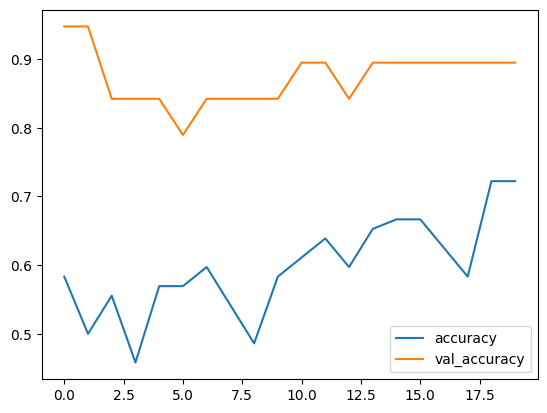

In [179]:
history_df = pd.DataFrame(history0.history)
history_df[['accuracy', 'val_accuracy']].plot()

In [180]:
Y_pred0 = model0.predict(X_test)

1/1 [==============================] - 3s 3s/step


In [184]:
acc = accuracy_score(np.argmax(Y_test, axis=1), np.argmax(Y_pred0, axis=1))

# Comparaison augmented data and non augmented data

Confusion matrix, without normalization
[[18  4]
 [ 5  1]]


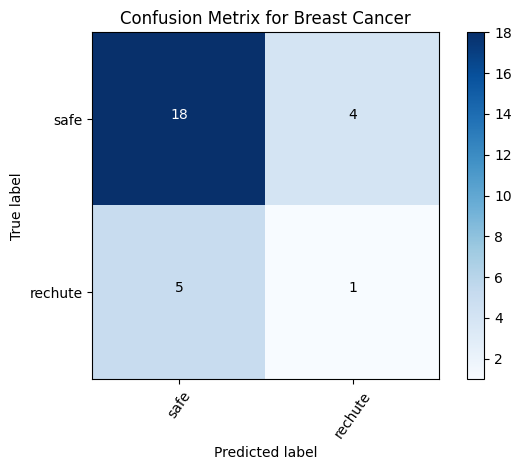

In [183]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=55)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cm = confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(Y_pred0, axis=1))

cm_plot_label =['safe', 'rechute']
plot_confusion_matrix(cm, cm_plot_label, title ='Confusion Metrix for Breast Cancer')

# LA COMPARAISON

In [185]:
from tabulate import tabulate
Data_types = ['Non-augmented data', 'augmented data']

# Définir les scores pour chaque modèle
score = [acc,acc_res]

# Créer une liste des scores
scores = zip(Data_types, score)

# Créer une liste des en-têtes de colonnes
headers = ['Data', 'Resnet-50 Score']

# Créer le tableau avec bordures en utilisant tabulate
table = tabulate(scores, headers, tablefmt='pipe')

# Afficher le tableau
print(table)

| Data               |   Resnet-50 Score |
|:-------------------|------------------:|
| Non-augmented data |          0.678571 |
| augmented data     |          0.945946 |


In [28]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the directory containing the images
data_dir = 'C:/Users/rimba/Desktop/data/0'

safe = np.array(Dataset_loader(data_dir, 224))

# Create an ImageDataGenerator instance with desired augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=180,  # Rotate images randomly by up to 20 degrees
    width_shift_range=0.1,  # Shift images horizontally by up to 10% of the width
    height_shift_range=0.1,  # Shift images vertically by up to 10% of the height
    zoom_range=0.2,  # Zoom in or out on images by up to 20%
    horizontal_flip=True  # Flip images horizontally
)

# Create a directory to store the augmented images
output_dir = 'C:/Users/rimba/Desktop/data/0_augmented'
os.makedirs(output_dir, exist_ok=True)

# Generate augmented images and save them to the output directory
for i, image in enumerate(safe):
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    augmented_images = datagen.flow(image, batch_size=1, save_to_dir=output_dir, save_prefix='augmented_',
                                    save_format='jpg')
    # Generate and save augmented images
    for j in range(1):  # Generate 10 augmented images per original image
        augmented_image = augmented_images.next()

# Print the total number of augmented images generated
num_augmented_images = len(os.listdir(output_dir))
print("Total number of augmented images:", num_augmented_images)

100%|██████████| 105/105 [00:00<00:00, 122.18it/s]


Total number of augmented images: 105


In [29]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the directory containing the images
data_dir = 'C:/Users/rimba/Desktop/data/1'

# Load the images into the dataset
rechute = np.array(Dataset_loader(data_dir, 224))

# Create an ImageDataGenerator instance with desired augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=180,  # Rotate images randomly by up to 20 degrees
    width_shift_range=0.1,  # Shift images horizontally by up to 10% of the width
    height_shift_range=0.1,  # Shift images vertically by up to 10% of the height
    zoom_range=0.2,  # Zoom in or out on images by up to 20%
    horizontal_flip=True  # Flip images horizontally
)

# Create a directory to store the augmented images
output_dir = 'C:/Users/rimba/Desktop/data/1_augmented'
os.makedirs(output_dir, exist_ok=True)

# Generate augmented images and save them to the output directory
for i, image in enumerate(rechute):
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    augmented_images = datagen.flow(image, batch_size=1, save_to_dir=output_dir, save_prefix='augmented_',
                                    save_format='jpg')
    # Generate and save augmented images
    for j in range(5):  # Generate 10 augmented images per original image
        augmented_image = augmented_images.next()

# Print the total number of augmented images generated
num_augmented_images = len(os.listdir(output_dir))
print("Total number of augmented images:", num_augmented_images)

100%|██████████| 14/14 [00:00<00:00, 99.22it/s] 


Total number of augmented images: 69


In [39]:
#Transfer 'jpg' images to an array IMG
def Dataset_loader(DIR, RESIZE, sigmaX=10):
    IMG = []
    read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))
    for IMAGE_NAME in tqdm(os.listdir(DIR)):
        PATH = os.path.join(DIR,IMAGE_NAME)
        _, ftype = os.path.splitext(PATH)
        if ftype == ".jpg":
            img = read(PATH)
           
            img = cv2.resize(img, (RESIZE,RESIZE))
           
            IMG.append(np.array(img))
    return IMG

In [40]:
safe_train = np.array(Dataset_loader('C:/Users/rimba/Desktop/data1/train/0',224))
rechute_train = np.array(Dataset_loader('C:/Users/rimba/Desktop/data1/train/1',224))
safe_test = np.array(Dataset_loader('C:/Users/rimba/Desktop/data1/test/0',224))
rechute_test = np.array(Dataset_loader('C:/Users/rimba/Desktop/data1/test/1',224))

100%|██████████| 16/16 [00:00<00:00, 499.91it/s]


In [41]:
print(rechute_test.shape)
print(safe_test.shape)
print(rechute_train.shape)
print(safe_train.shape) ### en total on a 194 images

(16, 224, 224, 3)
(21, 224, 224, 3)
(73, 224, 224, 3)
(84, 224, 224, 3)


In [42]:
safe_train_label = np.zeros(len(safe_train))
rechute_train_label = np.ones(len(rechute_train))
safe_test_label = np.zeros(len(safe_test))
rechute_test_label = np.ones(len(rechute_test))

# Merge data 
X_train = np.concatenate((safe_train, rechute_train), axis = 0)
Y_train = np.concatenate((safe_train_label, rechute_train_label), axis = 0)
X_test = np.concatenate((safe_test, rechute_test), axis = 0)
Y_test = np.concatenate((safe_test_label, rechute_test_label), axis = 0)

# Shuffle train data
s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
Y_train = Y_train[s]

# Shuffle test data
s = np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test = X_test[s]
Y_test = Y_test[s]
# To categorical
Y_train = to_categorical(Y_train, num_classes= 2) ##first classe is 'safe' second class
Y_test = to_categorical(Y_test, num_classes= 2)

In [43]:
Y_train

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.

In [51]:
x_train, x_val, y_train, y_val = train_test_split(
    X_train, Y_train, 
    test_size=0.2, 
    random_state=11
)

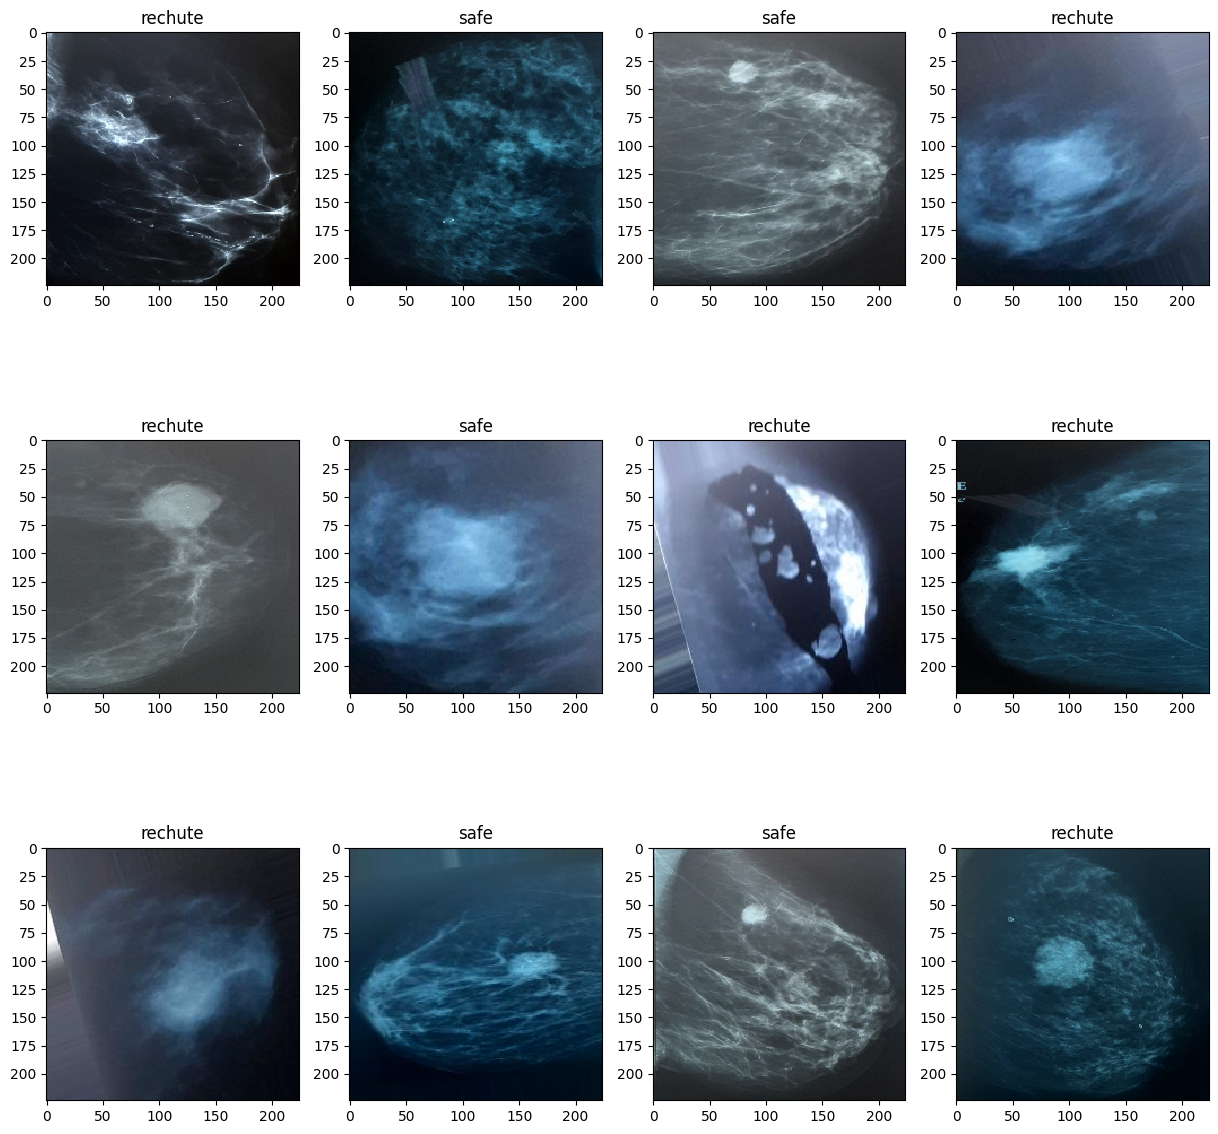

In [100]:
# # Display first 15 images of moles, and how they are classified
w=60
h=40
fig=plt.figure(figsize=(15, 15))
columns = 4
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if Y_train[i] == 0:
        ax.title.set_text('safe')
    else:
        ax.title.set_text('rechute')
    plt.imshow(x_train[i], interpolation='nearest')
plt.show()

In [102]:
Y_train[0]

array([0., 1.], dtype=float32)

In [45]:
X_train.shape

(157, 224, 224, 3)

In [46]:
# Learning Rate Reducer
learn_control = ReduceLROnPlateau(monitor='val_recall', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-7)

# Checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [47]:
BATCH_SIZE = 16

# Using original generator
train_generator = ImageDataGenerator(
        zoom_range=2,  # set range for random zoom
        rotation_range = 90,
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True,  # randomly flip images
    )

# Modeling

In [48]:
def build_model(backbone, lr=1e-4):
    model = Sequential()
    model.add(backbone)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(2, activation='softmax'))
    
    
    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(lr=lr),
        metrics=['accuracy']
    )
    
    return model

# ResNet50

In [49]:
K.clear_session()
gc.collect()

resnet = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)
model = build_model(resnet ,lr = 1e-4)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 batch_normalization (BatchN  (None, 2048)             8192      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 2)                 4098      
                                                                 
Total params: 23,600,002
Trainable params: 23,542,786
No

In [52]:
history = model.fit_generator(
    train_generator.flow(x_train, y_train, batch_size=BATCH_SIZE),
    steps_per_epoch=x_train.shape[0] / BATCH_SIZE,
    epochs=20,
    validation_data=(x_val, y_val),
    callbacks=[learn_control, checkpoint]
)

Epoch 1/20
7/7 [==============================] - 44s 6s/step - loss: 0.4172 - accuracy: 0.8080 - val_loss: 2.6991 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/20
7/7 [==============================] - 46s 6s/step - loss: 0.2884 - accuracy: 0.8640 - val_loss: 1.4728 - val_accuracy: 0.5625 - lr: 1.0000e-04
Epoch 3/20
7/7 [==============================] - 44s 6s/step - loss: 0.2182 - accuracy: 0.9120 - val_loss: 0.2877 - val_accuracy: 0.9375 - lr: 1.0000e-04
Epoch 4/20
7/7 [==============================] - 45s 6s/step - loss: 0.3239 - accuracy: 0.8800 - val_loss: 0.1440 - val_accuracy: 0.9375 - lr: 1.0000e-04
Epoch 5/20
7/7 [==============================] - 45s 6s/step - loss: 0.3254 - accuracy: 0.8720 - val_loss: 0.6371 - val_accuracy: 0.8750 - lr: 1.0000e-04
Epoch 6/20
7/7 [==============================] - 46s 6s/step - loss: 0.3070 - accuracy: 0.8800 - val_loss: 1.1067 - val_accuracy: 0.8125 - lr: 1.0000e-04
Epoch 7/20
7/7 [==============================] - 46s 6s/step - loss: 

7/7 [==============================] - 44s 6s/step - loss: 0.2091 - accuracy: 0.9440 - val_loss: 0.4489 - val_accuracy: 0.9062 - lr: 1.0000e-04
Epoch 19/20
7/7 [==============================] - 47s 6s/step - loss: 0.1293 - accuracy: 0.9440 - val_loss: 0.2626 - val_accuracy: 0.9062 - lr: 1.0000e-04
Epoch 20/20
7/7 [==============================] - 47s 6s/step - loss: 0.1342 - accuracy: 0.9440 - val_loss: 0.1090 - val_accuracy: 0.9688 - lr: 1.0000e-04


In [53]:
with open('history.json', 'w') as f:
    json.dump(str(history.history), f)

<Axes: >

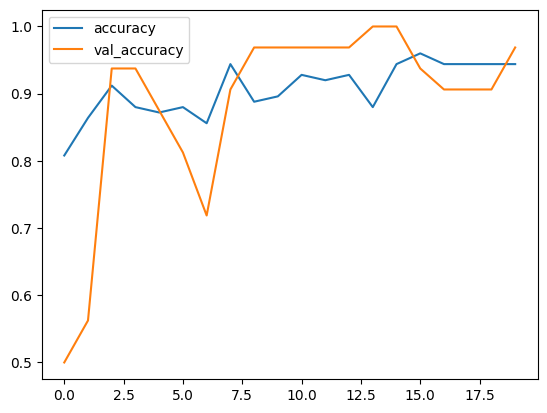

In [54]:
history_df = pd.DataFrame(history.history)
history_df[['accuracy', 'val_accuracy']].plot()

<Axes: >

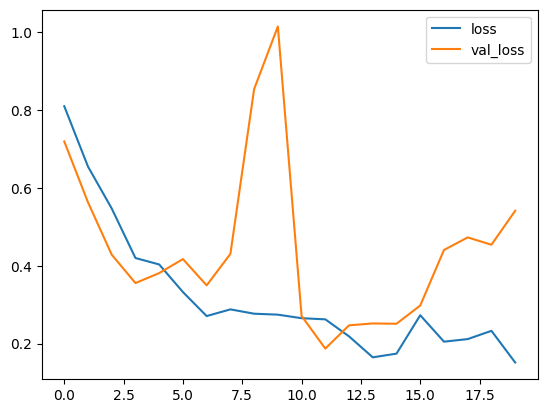

In [48]:
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot()

In [49]:
Y_val_pred = model.predict(x_val)

1/1 [==============================] - 3s 3s/step


In [50]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
accuracy_score(np.argmax(y_val, axis=1), np.argmax(Y_val_pred, axis=1))

0.9375

In [51]:
Y_pred = model.predict(X_test)

2/2 [==============================] - 3s 333ms/step


In [76]:
from tensorflow.keras.metrics import Recall
from sklearn.metrics import recall_score , precision_score
acc_res = accuracy_score(np.argmax(Y_test, axis=1), np.argmax(Y_pred, axis=1))
rec_res = recall_score(np.argmax(Y_test, axis=1), np.argmax(Y_pred, axis=1))
prec_res = precision_score(np.argmax(Y_test, axis=1), np.argmax(Y_pred, axis=1))

In [53]:
def print_model_error_rate(model, X_test, y_test):
    # Final evaluation of the model
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Model score : %.2f%%" % (scores[1]*100))
    print("Model error rate : %.2f%%" % (100-scores[1]*100))

In [54]:
print_model_error_rate(model, X_test, Y_test)

Model score : 94.59%
Model error rate : 5.41%


In [57]:
tta_steps = 10
predictions = []

for i in tqdm(range(tta_steps)):
    preds = model.predict_generator(train_generator.flow(X_test, batch_size=BATCH_SIZE, shuffle=False),
                                    steps = len(X_test)/BATCH_SIZE)
    
    predictions.append(preds)
    gc.collect()
    
Y_pred_tta = np.mean(predictions, axis=0)

  0%|          | 0/10 [00:00<?, ?it/s]C:\Users\rimba\AppData\Local\Temp\ipykernel_4100\3759147104.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(train_generator.flow(X_test, batch_size=BATCH_SIZE, shuffle=False),


100%|██████████| 10/10 [00:31<00:00,  3.10s/it]


Confusion matrix, without normalization
[[18  3]
 [ 0 16]]


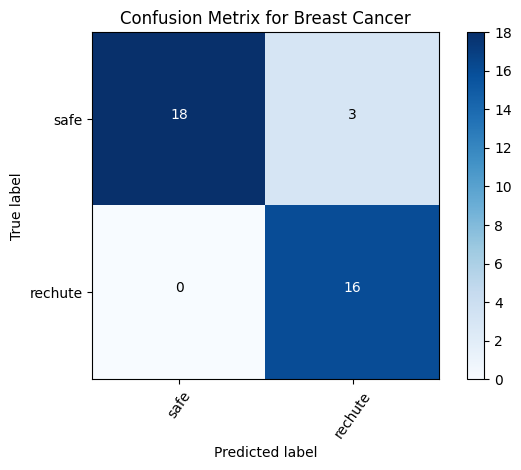

In [58]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=55)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cm = confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(Y_pred, axis=1))

cm_plot_label =['safe', 'rechute']
plot_confusion_matrix(cm, cm_plot_label, title ='Confusion Metrix for Breast Cancer')

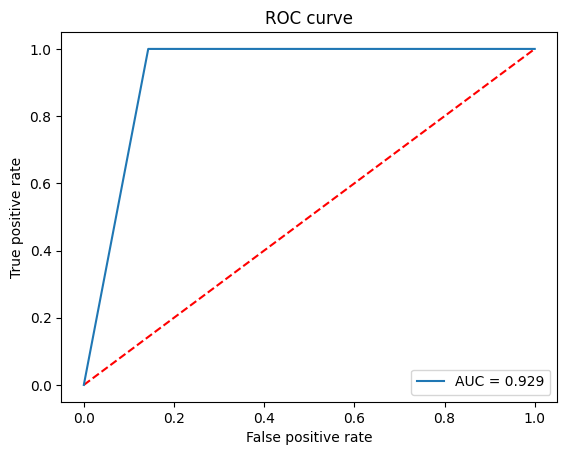

In [59]:
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve
roc_log = roc_auc_score(np.argmax(Y_test, axis=1), np.argmax(Y_pred_tta, axis=1))
false_positive_rate, true_positive_rate, threshold = roc_curve(np.argmax(Y_test, axis=1), np.argmax(Y_pred_tta, axis=1))
area_under_curve = auc(false_positive_rate, true_positive_rate)

plt.plot([0, 1], [0, 1], 'r--')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = {:.3f}'.format(area_under_curve))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
#plt.savefig(ROC_PLOT_FILE, bbox_inches='tight')
plt.close()

# VGG19

In [86]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

K.clear_session()
gc.collect()

resnet = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model1 = build_model(resnet ,lr = 1e-4)
model1.summary()

87910968/87910968 [==============================] - 85s 1us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 batch_normalization_94 (Bat  (None, 2048)             8192      
 chNormalization)                                                
                                                                 
 dense (Dense)               (None, 2)                 4098      
                                                        

In [87]:
history1 = model1.fit_generator(
    train_generator.flow(x_train, y_train, batch_size=BATCH_SIZE),
    steps_per_epoch=x_train.shape[0] / BATCH_SIZE,
    epochs=20,
    validation_data=(x_val, y_val),
    callbacks=[learn_control, checkpoint]
)

C:\Users\rimba\AppData\Local\Temp\ipykernel_17260\4180634674.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1 = model1.fit_generator(


Epoch 1/20
7/7 [==============================] - 40s 4s/step - loss: 0.8033 - accuracy: 0.5760 - val_loss: 0.7246 - val_accuracy: 0.5312 - lr: 1.0000e-04
Epoch 2/20
7/7 [==============================] - 29s 4s/step - loss: 0.6265 - accuracy: 0.7280 - val_loss: 0.9823 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 3/20
7/7 [==============================] - 29s 4s/step - loss: 0.6355 - accuracy: 0.6800 - val_loss: 0.9943 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 4/20
7/7 [==============================] - 30s 4s/step - loss: 0.5645 - accuracy: 0.7680 - val_loss: 0.8736 - val_accuracy: 0.5938 - lr: 1.0000e-04
Epoch 5/20
7/7 [==============================] - 29s 4s/step - loss: 0.4382 - accuracy: 0.8240 - val_loss: 0.9925 - val_accuracy: 0.5312 - lr: 1.0000e-04
Epoch 6/20
7/7 [==============================] - 29s 4s/step - loss: 0.4414 - accuracy: 0.8160 - val_loss: 0.9266 - val_accuracy: 0.5938 - lr: 1.0000e-04
Epoch 7/20
7/7 [==============================] - 29s 4s/step - loss: 

In [98]:
with open('history1.json', 'w') as f:
    json.dump(str(history1.history), f)

<Axes: >

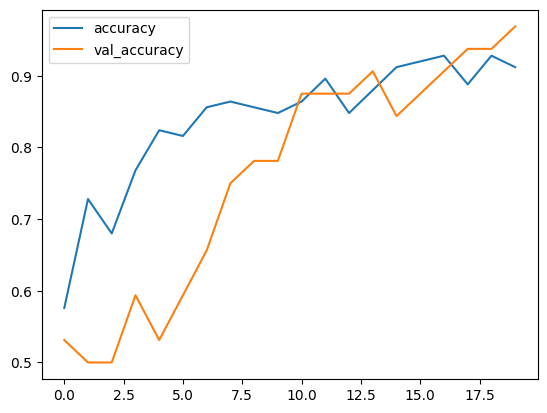

In [99]:
history_df = pd.DataFrame(history1.history)
history_df[['accuracy', 'val_accuracy']].plot()

In [ ]:
tta_steps = 10
predictions = []

for i in tqdm(range(tta_steps)):
    preds = model.predict_generator(train_generator.flow(X_test, batch_size=BATCH_SIZE, shuffle=False),
                                    steps = len(X_test)/BATCH_SIZE)
    
    predictions.append(preds)
    gc.collect()
    
Y_pred_tta = np.mean(predictions, axis=0)

Confusion matrix, without normalization
[[17  4]
 [ 0 16]]


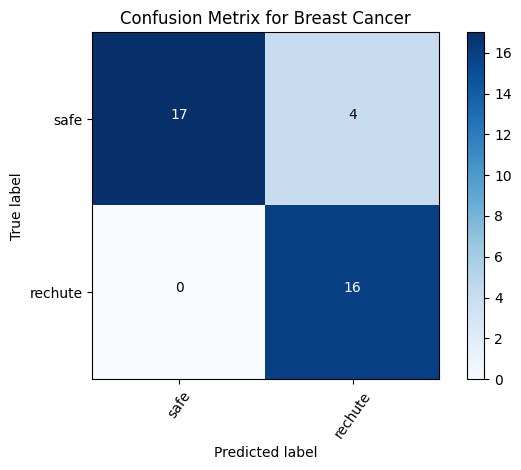

In [100]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=55)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cm = confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(Y_pred1, axis=1))

cm_plot_label =['safe', 'rechute']
plot_confusion_matrix(cm, cm_plot_label, title ='Confusion Metrix for Breast Cancer')

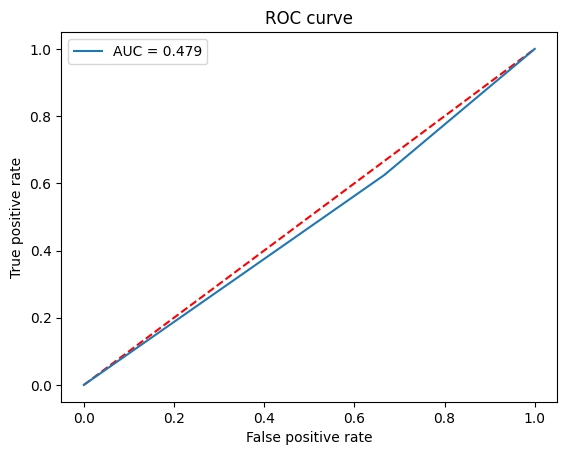

In [101]:
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve
roc_log = roc_auc_score(np.argmax(Y_test, axis=1), np.argmax(Y_pred_tta, axis=1))
false_positive_rate, true_positive_rate, threshold = roc_curve(np.argmax(Y_test, axis=1), np.argmax(Y_pred_tta, axis=1))
area_under_curve = auc(false_positive_rate, true_positive_rate)

plt.plot([0, 1], [0, 1], 'r--')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = {:.3f}'.format(area_under_curve))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
#plt.savefig(ROC_PLOT_FILE, bbox_inches='tight')
plt.close()

In [88]:
Y_val_pred1 = model1.predict(x_val)

1/1 [==============================] - 2s 2s/step


In [89]:
accuracy_score(np.argmax(y_val, axis=1), np.argmax(Y_val_pred1, axis=1))

0.96875

In [90]:
Y_pred1 = model1.predict(X_test)

2/2 [==============================] - 2s 201ms/step


In [95]:
acc_incep = accuracy_score(np.argmax(Y_test, axis=1), np.argmax(Y_pred1, axis=1))
rec_incep = recall_score(np.argmax(Y_test, axis=1), np.argmax(Y_pred1, axis=1))
prec_incep = precision_score(np.argmax(Y_test, axis=1), np.argmax(Y_pred1, axis=1))

In [5]:
x_train.shape

(125, 224, 224, 3)

# DenseNet201

In [55]:
K.clear_session()
gc.collect()

resnet = DenseNet201(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

model2 = build_model(resnet ,lr = 1e-4)
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 global_average_pooling2d (G  (None, 1920)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1920)              0         
                                                                 
 batch_normalization (BatchN  (None, 1920)             7680      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 2)                 3842      
                                                                 
Total params: 18,333,506
Trainable params: 18,100,610
No

C:\Users\rimba\anaconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [69]:
history2 = model2.fit_generator(
    train_generator.flow(x_train, y_train, batch_size=BATCH_SIZE),
    steps_per_epoch=x_train.shape[0] / BATCH_SIZE,
    epochs=20,
    validation_data=(x_val, y_val),
    callbacks=[learn_control, checkpoint]
)

C:\Users\rimba\AppData\Local\Temp\ipykernel_17260\490327544.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2 = model2.fit_generator(


Epoch 1/20
7/7 [==============================] - 155s 17s/step - loss: 0.2037 - accuracy: 0.9440 - val_loss: 0.1376 - val_accuracy: 0.9375 - lr: 1.0000e-04
Epoch 2/20
7/7 [==============================] - 124s 17s/step - loss: 0.0862 - accuracy: 0.9920 - val_loss: 0.1324 - val_accuracy: 0.9688 - lr: 1.0000e-04
Epoch 3/20
7/7 [==============================] - 124s 16s/step - loss: 0.1473 - accuracy: 0.9600 - val_loss: 0.2035 - val_accuracy: 0.9688 - lr: 1.0000e-04
Epoch 4/20
7/7 [==============================] - 91s 12s/step - loss: 0.1159 - accuracy: 0.9520 - val_loss: 0.3022 - val_accuracy: 0.8750 - lr: 1.0000e-04
Epoch 5/20
7/7 [==============================] - 94s 12s/step - loss: 0.1275 - accuracy: 0.9360 - val_loss: 0.3745 - val_accuracy: 0.8750 - lr: 1.0000e-04
Epoch 6/20
7/7 [==============================] - 109s 14s/step - loss: 0.0914 - accuracy: 0.9680 - val_loss: 0.1577 - val_accuracy: 0.9062 - lr: 1.0000e-04
Epoch 7/20
7/7 [==============================] - 86s 11s/st

Epoch 18/20
7/7 [==============================] - 86s 11s/step - loss: 0.0827 - accuracy: 0.9840 - val_loss: 0.2116 - val_accuracy: 0.9062 - lr: 1.0000e-04
Epoch 19/20
7/7 [==============================] - 86s 11s/step - loss: 0.1471 - accuracy: 0.9520 - val_loss: 0.1345 - val_accuracy: 0.9688 - lr: 1.0000e-04
Epoch 20/20
7/7 [==============================] - 85s 11s/step - loss: 0.1321 - accuracy: 0.9520 - val_loss: 0.0577 - val_accuracy: 1.0000 - lr: 1.0000e-04


In [57]:
with open('history2.json', 'w') as f:
    json.dump(str(history2.history), f)

<Axes: >

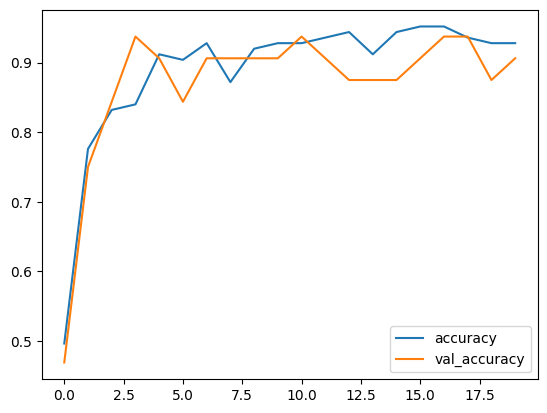

In [58]:
history_df = pd.DataFrame(history2.history)
history_df[['accuracy', 'val_accuracy']].plot()

In [60]:
tta_steps = 10
predictions = []

for i in tqdm(range(tta_steps)):
    preds = model2.predict_generator(train_generator.flow(X_test, batch_size=BATCH_SIZE, shuffle=False),
                                    steps = len(X_test)/BATCH_SIZE)
    
    predictions.append(preds)
    gc.collect()
    
Y_pred_tta = np.mean(predictions, axis=0)

  0%|          | 0/10 [00:00<?, ?it/s]C:\Users\rimba\AppData\Local\Temp\ipykernel_17260\1253292005.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model2.predict_generator(train_generator.flow(X_test, batch_size=BATCH_SIZE, shuffle=False),
100%|██████████| 10/10 [01:24<00:00,  8.42s/it]


Confusion matrix, without normalization
[[17  4]
 [ 0 16]]


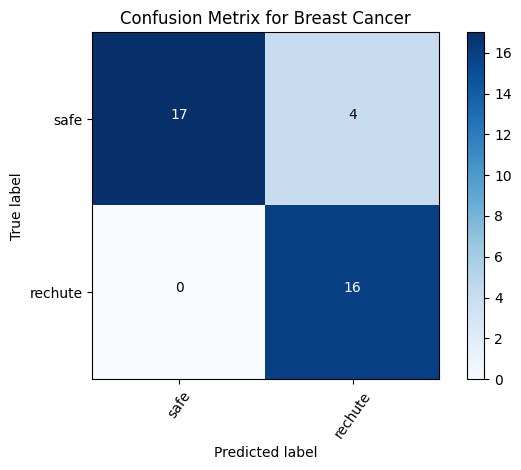

In [77]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=55)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cm = confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(Y_pred2, axis=1))

cm_plot_label =['safe', 'rechute']
plot_confusion_matrix(cm, cm_plot_label, title ='Confusion Metrix for Breast Cancer')

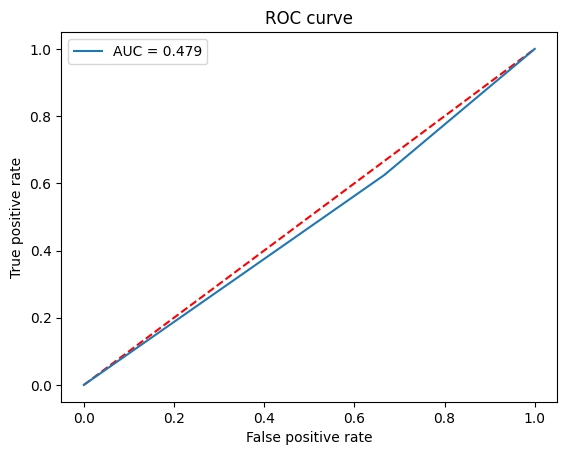

In [97]:
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve
roc_log = roc_auc_score(np.argmax(Y_test, axis=1), np.argmax(Y_pred_tta, axis=1))
false_positive_rate, true_positive_rate, threshold = roc_curve(np.argmax(Y_test, axis=1), np.argmax(Y_pred_tta, axis=1))
area_under_curve = auc(false_positive_rate, true_positive_rate)

plt.plot([0, 1], [0, 1], 'r--')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = {:.3f}'.format(area_under_curve))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
#plt.savefig(ROC_PLOT_FILE, bbox_inches='tight')
plt.close()

In [70]:
Y_val_pred2 = model2.predict(x_val)

1/1 [==============================] - 4s 4s/step


In [71]:
accuracy_score(np.argmax(y_val, axis=1), np.argmax(Y_val_pred2, axis=1))

1.0

In [72]:
Y_pred2 = model2.predict(X_test)

2/2 [==============================] - 4s 691ms/step


In [78]:
acc_dense = accuracy_score(np.argmax(Y_test, axis=1), np.argmax(Y_pred2, axis=1))
rec_dense = recall_score(np.argmax(Y_test, axis=1), np.argmax(Y_pred2, axis=1))
prec_dense = precision_score(np.argmax(Y_test, axis=1), np.argmax(Y_pred2, axis=1))

In [ ]:
print_model_error_rate(model2, X_test, Y_test)

In [96]:
from tabulate import tabulate
model_names = ['ResNet-50', 'InceptionV3', 'DenseNet-201']

# Définir les scores pour chaque modèle
recall_scores = [rec_res, rec_incep, rec_dense]
precision_scores = [prec_res, prec_incep, prec_dense]
accuracy_scores = [acc_res, acc_incep, acc_dense]

# Créer une liste des scores
scores = zip(model_names, recall_scores, precision_scores, accuracy_scores)

# Créer une liste des en-têtes de colonnes
headers = ['Model', 'Recall', 'Precision', 'Accuracy']

# Créer le tableau avec bordures en utilisant tabulate
table = tabulate(scores, headers, tablefmt='pipe')

# Afficher le tableau
print(table)

| Model        |   Recall |   Precision |   Accuracy |
|:-------------|---------:|------------:|-----------:|
| ResNet-50    |        1 |    0.888889 |   0.945946 |
| InceptionV3  |        1 |    0.8      |   0.891892 |
| DenseNet-201 |        1 |    0.8      |   0.891892 |
